In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sb
import random
import unidecode
import re
from collections import Counter
import nltk
from tqdm import tqdm
tqdm.pandas()
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_json('train.json') # store as dataframe objects
test_data = pd.read_json('test.json')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [5]:
train_data.shape

(39774, 3)

In [6]:
print("The training data consists of {} recipes".format(len(train_data)))

The training data consists of 39774 recipes


In [7]:
print("First five elements in our training sample:")
train_data.head()

First five elements in our training sample:


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


In [9]:
test_data.shape

(9944, 2)

In [10]:
print("The test data consists of {} recipes".format(len(test_data)))

The test data consists of 9944 recipes


In [11]:
print("First five elements in our training sample:")
test_data.head()

First five elements in our training sample:


,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [12]:
print("Number of cuisine categories: {}".format(len(train_data.cuisine.unique())))
train_data.cuisine.unique()

Number of cuisine categories: 20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [13]:
def random_colours(number_of_colors):
    number_of_colors - 20
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

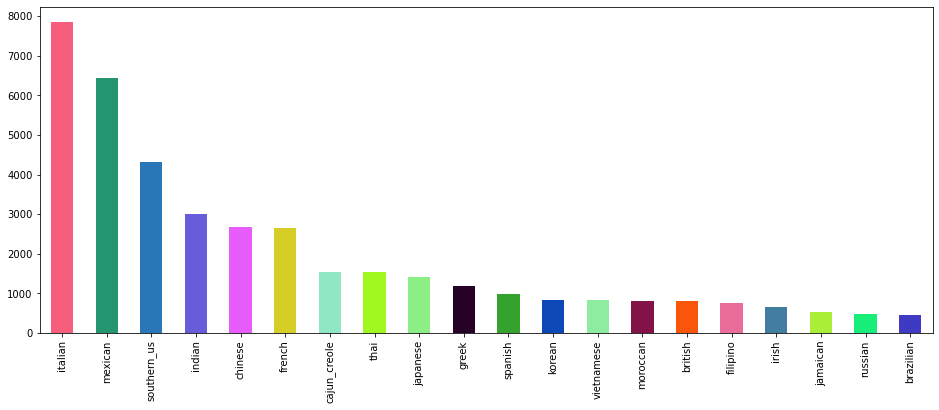

In [14]:
train_data['cuisine'].value_counts().plot.bar(color=random_colours(20),figsize=(16,6))

C:\Users\g3097\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


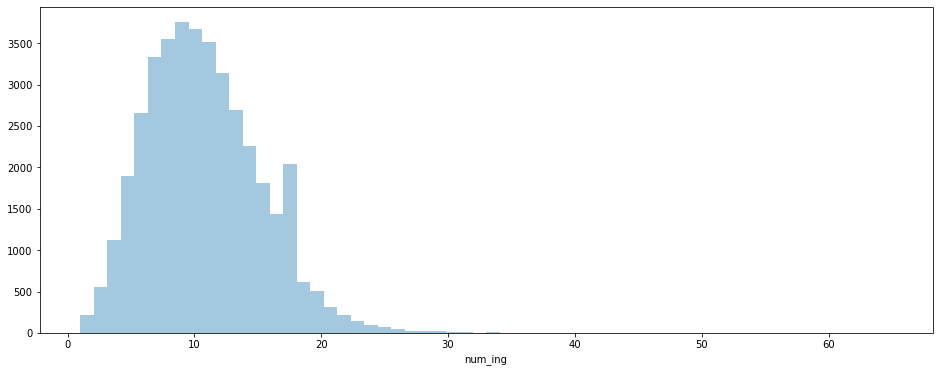

In [15]:
train_data['num_ing'] = train_data['ingredients'].str.len()

plt.figure(figsize=(16,6))
sb.distplot(train_data['num_ing'],kde =False ,bins=60)

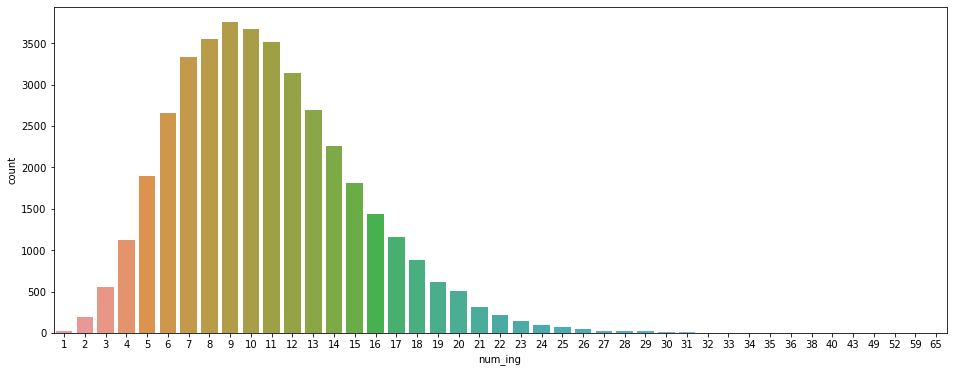

In [16]:
plt.figure(figsize=(16,6))
sb.countplot(x='num_ing',data=train_data)

In [17]:
print('Maximum Number of Ingredients in a Dish: ',train_data['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',train_data['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


In [18]:
longrecipes = train_data[train_data['ingredients'].str.len() > 30]
print("It seems that {} recipes consist of more than 30 ingredients.".format(len(longrecipes)))

It seems that 40 recipes consist of more than 30 ingredients.


In [19]:
print("Exploring the ingredients in the longest recipe in our training set:" + "\n")
print(str(list(longrecipes[longrecipes['ingredients'].str.len() == 65].ingredients.values)) + "\n")
print("Cuisine: " + str(list(longrecipes[longrecipes['ingredients'].str.len() == 65].cuisine)))

Exploring the ingredients in the longest recipe in our training set:

[['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'Neufchâtel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground p

In [20]:
shortrecipes = train_data[train_data['ingredients'].str.len() <= 2]
print("It seems that {} recipes consist of less than or equal to 2 ingredients.".format(len(shortrecipes)))

It seems that 215 recipes consist of less than or equal to 2 ingredients.


In [21]:
print("Explore the ingredients in the shortest recipes in our training set:" + "\n")
print(list(train_data[train_data['ingredients'].str.len() == 1].ingredients.values))
print("And there corresponding labels" + "\n")
print(list(train_data[train_data['ingredients'].str.len() == 1].cuisine.values))

Explore the ingredients in the shortest recipes in our training set:

[['sushi rice'], ['dried rice noodles'], ['plain low-fat yogurt'], ['unsalted butter'], ['udon'], ['sticky rice'], ['butter'], ['corn tortillas'], ['grained'], ['lemonade concentrate'], ['jasmine rice'], ['unsalted butter'], ['cherry tomatoes'], ['butter'], ['cumin seed'], ['haricots verts'], ['vegetable oil'], ['spanish chorizo'], ['sweetened condensed milk'], ['water'], ['phyllo'], ['unsalted butter']]
And there corresponding labels

['japanese', 'vietnamese', 'indian', 'indian', 'japanese', 'thai', 'indian', 'mexican', 'thai', 'southern_us', 'thai', 'indian', 'italian', 'french', 'indian', 'french', 'mexican', 'spanish', 'spanish', 'japanese', 'greek', 'indian']


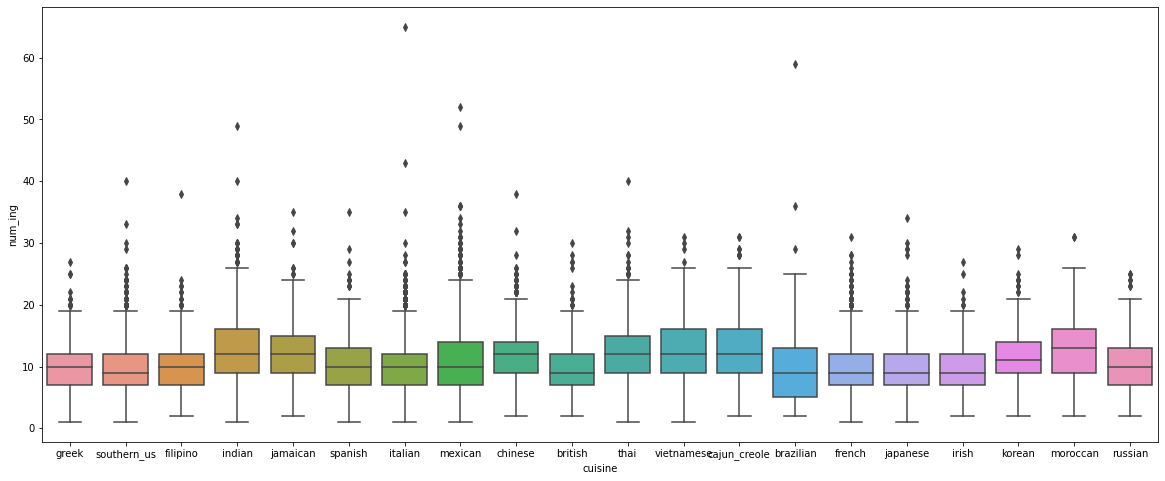

In [22]:
plt.figure(figsize=(20,8))
sb.boxplot(x='cuisine',y='num_ing',data=train_data)

In [23]:
raw_ingredients = [ing for ingredients in train_data['ingredients'] for ing in ingredients]

In [24]:
list(set([ingredient for ingredient in raw_ingredients if re.findall('[A-Z]+', ingredient)]))[:5]

['Kahlua Liqueur',
 'India Pale Ale',
 'Soy Vay® Veri Veri Teriyaki® Marinade & Sauce',
 'Japanese turnips',
 'Progresso™ Chicken Broth']

In [25]:
list(set([ingredient for ingredient in raw_ingredients if '’' in ingredient]))

['sheep’s milk cheese', 'Breakstone’s Sour Cream', 'Zatarain’s Jambalaya Mix']

In [26]:
list(set([ingredient for ingredient in raw_ingredients if re.findall('-', ingredient)]))[:5]

['no-salt-added black beans',
 'gluten-free broth',
 'pork country-style ribs',
 'butter-flavored spray',
 'shredded low-fat jarlsberg cheese']

In [27]:
temp_ing = list(set([ingredient for ingredient in raw_ingredients if re.findall('[0-9]', ingredient)]))
temp_ing[:5]

['2% reduced-fat milk',
 'licor 43',
 'Sargento® Traditional Cut Shredded 4 Cheese Mexican',
 '40% less sodium taco seasoning',
 'Bengali 5 Spice']

In [28]:
len(temp_ing)

40

In [29]:
keywords = ['american', 'greek', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'thai',
    'vietnamese', 'cajun', 'creole', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian',
]
d ={}
for k in keywords:
    temp = [ingredient for ingredient in raw_ingredients if k in ingredient]
    d[k] = temp

In [30]:
d['american']

['american cheese slices',
 'american cheese slices',
 'american cheese slices',
 'american cheese food']

In [31]:
temp

['red russian kale', 'red russian kale', 'red russian kale']

In [32]:
train_data

,id,cuisine,ingredients,num_ing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21


In [33]:
top = Counter([item for sublist in train_data['ingredients'] for item in sublist])
print(top.most_common(20))

[('salt', 18049), ('onions', 7972), ('olive oil', 7972), ('water', 7457), ('garlic', 7380), ('sugar', 6434), ('garlic cloves', 6237), ('butter', 4848), ('ground black pepper', 4785), ('all-purpose flour', 4632), ('pepper', 4438), ('vegetable oil', 4385), ('eggs', 3388), ('soy sauce', 3296), ('kosher salt', 3113), ('green onions', 3078), ('tomatoes', 3058), ('large eggs', 2948), ('carrots', 2814), ('unsalted butter', 2782)]


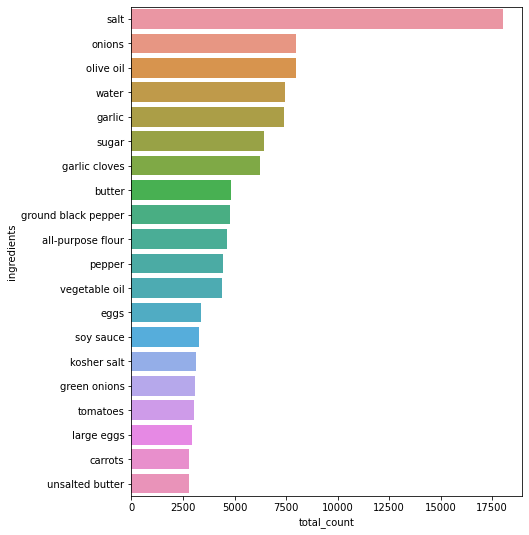

In [34]:
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['ingredients','total_count']
plt.figure(figsize=(7,9))
sb.barplot(x='total_count',y='ingredients',data=temp)

In [35]:
train_data = train_data[train_data['num_ing'] > 1]

In [36]:
train_data = train_data[train_data['num_ing']<60]

In [37]:
train_data.shape

(39751, 4)

In [38]:
lemmatizer = WordNetLemmatizer()
def preprocess(ingredients):
    ingredients_text = ' '.join(ingredients)
    ingredients_text = ingredients_text.lower() #Lower - Casing
    ingredients_text = ingredients_text.replace('-', ' ') # Removing Hyphen
    words = []
    for word in ingredients_text.split():
        word = re.sub("[0-9]"," ",word) #removing numbers,punctuations and special characters
        word = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', word) # Removing Units
        if len(word) <= 2: continue # Removing words with less than two characters
        word = unidecode.unidecode(word) #Removing accents
        word = lemmatizer.lemmatize(word) #Lemmatize
        if len(word) > 0: words.append(word)
    return ' '.join(words)

In [39]:
# Checking if our function works
for ingredient, expected in [
    ('Eggs', 'egg'),
    ('all-purpose flour', 'all purpose flour'),
    ('purée', 'puree'),
    ('1% low-fat milk', 'low fat milk'),
    ('half & half', 'half half'),
    ('safetida (powder)', 'safetida (powder)')
]:
    actual = preprocess([ingredient])
    assert actual == expected, f'"{expected}" is expected but got "{actual}"'

In [40]:
train_data['x'] = train_data['ingredients'].progress_apply(preprocess)
test_data['x'] = test_data['ingredients'].progress_apply(preprocess)
train_data.head()

100%|██████████| 9944/9944 [00:02<00:00, 4835.55it/s]


,id,cuisine,ingredients,num_ing,x
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,romaine lettuce black olive grape tomato garli...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,plain flour ground pepper salt tomato ground b...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,black pepper shallot cornflour cayenne pepper ...


In [41]:
train_data.shape

(39751, 5)

In [42]:
cuisines_train = list()
ingredients_train = list()

cuisines_train= train_data['cuisine']
ingredients_train= train_data['ingredients']
    
ingredients_test = list()

ingredients_test= test_data['ingredients']

In [43]:
print(len(ingredients_train))
print(len(cuisines_train))
print(len(ingredients_test))

39751
39751
9944


In [44]:
# Keep track of test ids
test_ids = test_data['id']

In [45]:
# Get unique values for cuisine and ingredients
cuisines_set = set(cuisines_train)
ingredients_set = set([item for sub in ingredients_train for item in sub] + [item for sub in ingredients_test for item in sub])
print(len(cuisines_set))
print(len(ingredients_set))

20
7136


In [46]:
# Create binary mapping for each ingredient and cuisine

ingredient_mapper = dict()
for count, elem in enumerate(ingredients_set):
    ingredient_mapper[elem] = count
    
cuisines_mapper = dict()
for count, elem in enumerate(cuisines_set):
    cuisines_mapper[elem] = count

# Save keys in a list
ingredients_keys = ingredient_mapper.keys()
cuisines_keys = cuisines_mapper.keys()

In [47]:
def encode_ingredient(ingredient_list):
    encoded_ingr = np.zeros(len(ingredients_set))
    for ing in ingredient_list:
        index = ingredient_mapper[ing]
        encoded_ingr[index] = 1
    return encoded_ingr

def encode_cuisine(cuisine_list):
    encoded_cuis = np.zeros(len(cuisines_set))
    if i in cuisines_keys:
        encoded_cuis[cuisines_mapper[i]] = 1
    return encoded_cuis

In [48]:
# Produce encoded 7136-dimensional vector for ingredients (train)

encoded_ingredients_list_train = list()
for i in ingredients_train:
    encoded_ingredients_list_train.append(encode_ingredient(i))

In [49]:
# Produce encoded 20-dimensional vector for cuisines

encoded_cuisines_list_train = list()
for i in cuisines_train:
    encoded_cuisines_list_train.append(encode_cuisine(i))

In [50]:
# Produce encoded 7126-dimensional vector for ingredients (test)

encoded_ingredients_list_test = list()
for i in ingredients_test:
    encoded_ingr = np.zeros(len(ingredients_set))
    for j in i:
        index = ingredient_mapper[j]
        encoded_ingr[index] = 1
    encoded_ingredients_list_test.append(encoded_ingr)

In [51]:
# Convert to Numpy Array

ing_train = [np.asarray(i) for i in encoded_ingredients_list_train]
cuis_train = [np.asarray(i) for i in encoded_cuisines_list_train]
ing_test = [np.asarray(i) for i in encoded_ingredients_list_test]

In [52]:
print(len(encoded_ingredients_list_train))
print(len(encoded_cuisines_list_train))
print(len(encoded_ingredients_list_test))
print(len(ing_train))
print(len(cuis_train))
print(len(ing_test))
print(len(ing_train[1]))

39751
39751
9944
39751
39751
9944
7136


In [53]:
#Import tensorflow framework to do prediction 
import tensorflow as tf

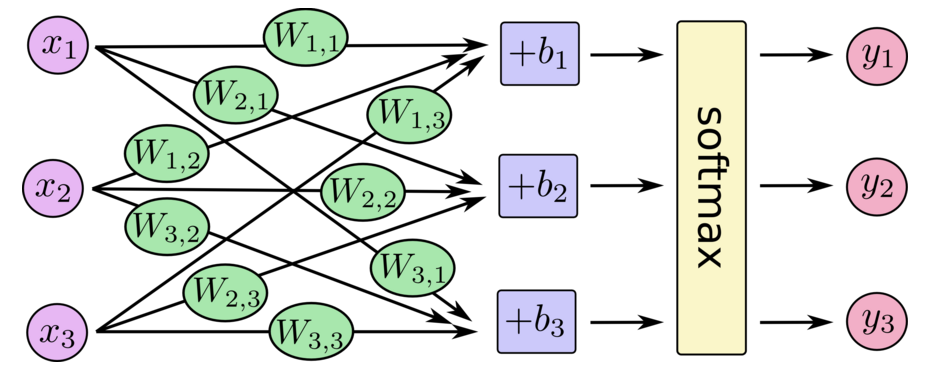

In [54]:
from IPython.display import Image
Image("diag.png")

In [55]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
x = tf.placeholder(tf.float32, [None, 7136])


Instructions for updating:
non-resource variables are not supported in the long term


In [71]:
# Store all computational information
W = tf.Variable(tf.zeros([7136, 20]))
b = tf.Variable(tf.zeros([20]))
x.shape

TensorShape([Dimension(None), Dimension(7136)])

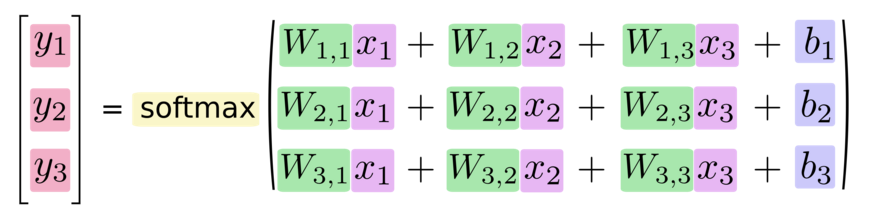

In [57]:
Image("comp.png")

In [58]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 20])

In [59]:
# Loss function --> Cross Entropy
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

* Determine parameters through back propagation
* Define the learning steps to minimize the loss, optimizing the learning rate of 0.01 Gradient Descent method
* Backpropagation Descent method

In [60]:
# Learning Step
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [61]:
keep_prob = tf.placeholder("float")


In [62]:
# Initiates a session to actually perform computations
# Parralelization. We can assign CPUs/GPUs here
sess = tf.InteractiveSession()

# Initiate our variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [63]:
# Build model and slowly adding sets of K random observations
for i in range(4000):
    K = 30
    indices = random.sample(range(len(ing_train)), K)
    batch_xs = [ing_train[i] for i in sorted(indices)]
    batch_ys = [cuis_train[i] for i in sorted(indices)]
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [64]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [65]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [66]:
# Run a separate instance of interactive session for each computation.
print(sess.run(accuracy, feed_dict={x: ing_train, y_: cuis_train}))

0.7495157


In [67]:
# Retrieve prediction for test
prediction = tf.argmax(y,1).eval(feed_dict={x: ing_test, keep_prob: 1.0})

In [68]:
cuis_pred = list()
for i in prediction:
    for name, num in cuisines_mapper.items():
        if num == i:
            cuis_pred.append(name)

In [69]:
import pandas as pd
dictionary = dict(zip(test_ids, cuis_pred))

df = pd.DataFrame(dictionary.items())
df.columns = ['id', 'cuisine']
df.head()

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian


In [70]:
df.to_csv("submission.csv", index = False)